# 데이터.zip 풀기 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/rock_scissor_paper

/content/gdrive/My Drive/rock_scissor_paper


In [ ]:
!ls /content/gdrive/My\ Drive/rock_scissor_paper

papers_complete.zip  rocks_complete.zip  scissors_complete.zip
rocks_complete	     scissors_complete


In [ ]:
!unzip -qq /content/gdrive/My\ Drive/rock_scissor_paper/papers_complete.zip

# 데이터 불러오기 + Resize

In [ ]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
import os

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

In [ ]:
image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper/scissors_complete"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

994  images to be resized.
994  images resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper/rocks_complete"
resize_images(image_dir_path)
print("주먹 이미지 resize 완료!")

1105  images to be resized.
1105  images resized.
주먹 이미지 resize 완료!


In [ ]:
image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper/papers_complete"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

1108  images to be resized.
1108  images resized.
보 이미지 resize 완료!


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=3207):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors_complete/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rocks_complete/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/papers_complete/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper"
(x, y)=load_data(image_dir_path)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.18,
                                                    random_state = 42)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 3207 입니다.
x_train shape: (2629, 28, 28, 3)
y_train shape: (2629,)
x_test shape: (578, 28, 28, 3)
y_test shape: (578,)


라벨:  2


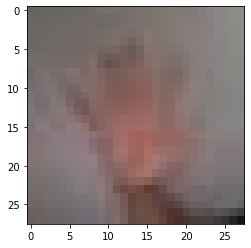

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기


In [ ]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


Model에 추가된 Layer 개수:  7


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

# 딥러닝 네트워크 학습시키기

In [ ]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (2629, 28, 28, 3)
Before Reshape - x_test_norm shape: (578, 28, 28, 3)
After Reshape - x_train_reshaped shape: (2629, 28, 28, 3)
After Reshape - x_test_reshaped shape: (578, 28, 28, 3)


In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=15)

Epoch 1/15
83/83 [==============================] - 2s 18ms/step - loss: 1.0501 - accuracy: 0.4614
Epoch 2/15
83/83 [==============================] - 2s 18ms/step - loss: 0.8696 - accuracy: 0.6196
Epoch 3/15
83/83 [==============================] - 2s 18ms/step - loss: 0.6821 - accuracy: 0.7193
Epoch 4/15
83/83 [==============================] - 2s 18ms/step - loss: 0.5477 - accuracy: 0.7820
Epoch 5/15
83/83 [==============================] - 2s 18ms/step - loss: 0.4368 - accuracy: 0.8342
Epoch 6/15
83/83 [==============================] - 1s 18ms/step - loss: 0.3561 - accuracy: 0.8733
Epoch 7/15
83/83 [==============================] - 2s 18ms/step - loss: 0.2897 - accuracy: 0.8984
Epoch 8/15
83/83 [==============================] - 2s 19ms/step - loss: 0.2470 - accuracy: 0.9232
Epoch 9/15
83/83 [==============================] - 2s 18ms/step - loss: 0.1970 - accuracy: 0.9350
Epoch 10/15
83/83 [==============================] - 2s 18ms/step - loss: 0.1718 - accuracy: 0.9486
Epoch 11/

## split한 test data 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 0.1364 - accuracy: 0.9637
test_loss: 0.1364164799451828 
test_accuracy: 0.9636678099632263


# 한번도 쓰이지 않은 ! 새로운 test data

In [ ]:
!ls /content/gdrive/My\ Drive/TEST

paper.zip  rock.zip  scissor.zip


In [ ]:
!unzip -qq /content/gdrive/My\ Drive/TEST/rock.zip

In [ ]:
!unzip -qq /content/gdrive/My\ Drive/TEST/scissor.zip

In [ ]:
image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

109  images to be resized.
109  images resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper/paper"
resize_images(image_dir_path)

image_dir_path = "/content/gdrive/My Drive/rock_scissor_paper/scissor"
resize_images(image_dir_path)

109  images to be resized.
109  images resized.
109  images to be resized.
109  images resized.


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=327):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/gdrive/My Drive/TEST"
(x_test2, y_test2)=load_data(image_dir_path)

x_test2_norm = x_test2/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test2 shape: {}".format(x_test2.shape))
print("y_test2 shape: {}".format(y_test2.shape))

학습데이터(x_train)의 이미지 개수는 327 입니다.
x_test2 shape: (327, 28, 28, 3)
y_test2 shape: (327,)


라벨:  0


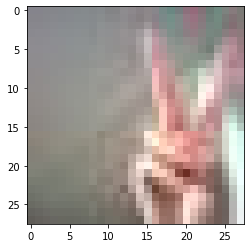

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test2[0])
print('라벨: ', y_test2[0])

In [ ]:
print("Before Reshape - x_test2_norm shape: {}".format(x_test2_norm.shape))

x_test2_reshaped=x_test2_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test2_reshaped shape: {}".format(x_test2_reshaped.shape))

Before Reshape - x_test2_norm shape: (327, 28, 28, 3)
After Reshape - x_test2_reshaped shape: (327, 28, 28, 3)


# 더 좋은 네트워크 만들기

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=20
n_channel_2=40
n_dense=20
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test2_reshaped, y_test2, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 20)        560       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 40)        7240      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                20020     
_________________________________________________________________
dense_25 (Dense)             (None, 3)               